# Спектральный анализ электрических сигналов

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as smp
from scipy.interpolate import interp1d
import pandas as pd
import dataframe_image as dfi
from scipy.stats import linregress

### Изучение спектра прямоугольного сигнала

In [2]:
#данные для t = 50 мкс, f = 1kHz
data_50_1 = pd.DataFrame({'freq[kHz]': np.array([0,1.04,2,2.98,3.97,5,5.98,7.0]),
                          'A': np.array([100.3,68.4,69.8,64.2,65.2,61,56.4,51.786])})
data_50_1


,freq[kHz],A
0,0.00,100.300
1,1.04,68.400
2,2.00,69.800
3,2.98,64.200
4,3.97,65.200
5,5.00,61.000
6,5.98,56.400
7,7.00,51.786


In [3]:
dfi.export(data_50_1.style.background_gradient(),"pulse_50_1.png")

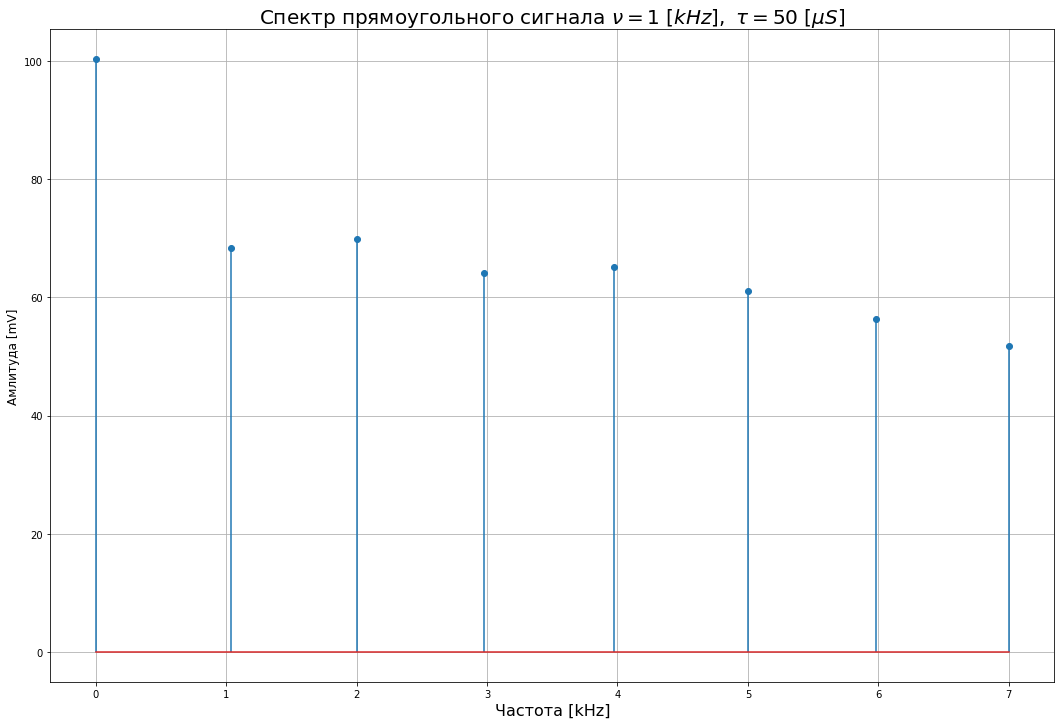

In [4]:
fig,ax = plt.subplots(figsize = (18,12))

plt.grid()
plt.stem(data_50_1['freq[kHz]'],data_50_1['A'])
plt.xlabel("Частота [kHz]",fontsize = 16)
plt.ylabel("Амлитуда [mV]",fontsize = 12)
plt.title(r"Спектр прямоугольного сигнала $\nu = 1 \ [kHz],\ \tau = 50 \ [\mu S]$",fontsize = 20)
plt.show()

In [5]:
# данные для tau = 100,freq = 1
data_100_1 = pd.DataFrame({'freq[kHz]': np.array([0.03,1.03,1.99,3,4,5,5.93,7,7.96]),
                            'A': np.array([197.3,132.6,128.5,118.3,105.8,84.1,68.8,48.6,28.65])})
dfi.export(data_100_1.style.background_gradient(),"pulse_100_1.png")

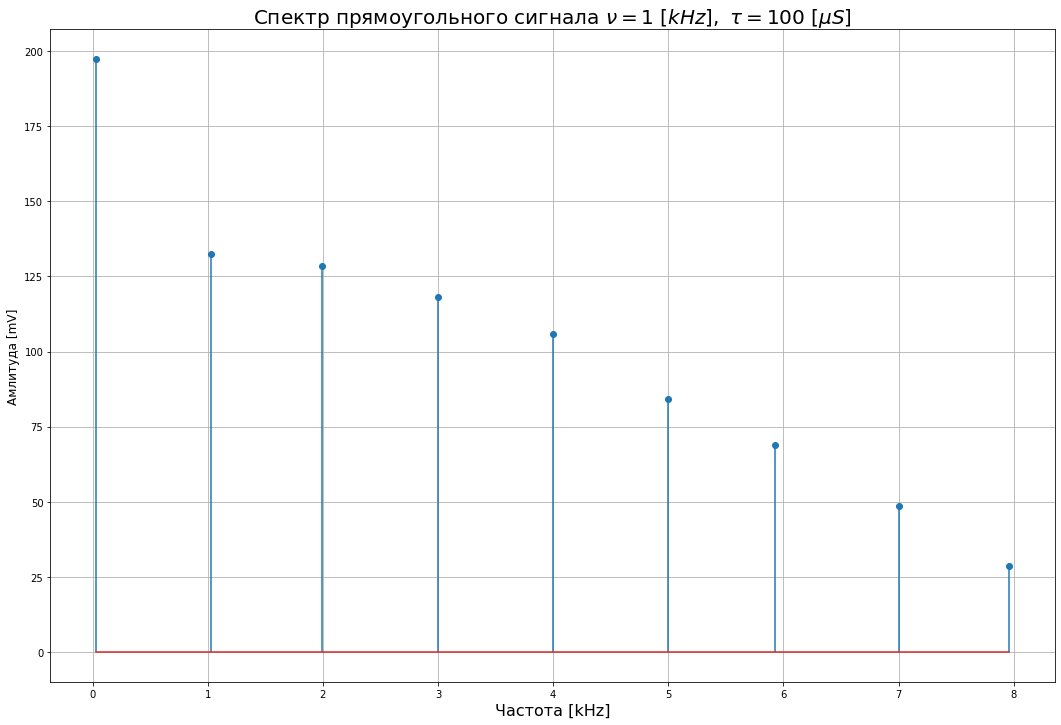

In [6]:
fig,ax = plt.subplots(figsize = (18,12))

plt.grid()
plt.stem(data_100_1['freq[kHz]'],data_100_1['A'])
plt.xlabel("Частота [kHz]",fontsize = 16)
plt.ylabel("Амлитуда [mV]",fontsize = 12)
plt.title(r"Спектр прямоугольного сигнала $\nu = 1 \ [kHz],\ \tau = 100 \ [\mu S]$",fontsize = 20)
plt.show()

### Зависимость ширины от $1/\tau$

![pulse](pulseTauModulationData.png)

In [7]:
data_deltaNu_tau = pd.DataFrame({'tau': np.array([40+i*20 for i in range(5)])*np.power(0.1,6),
                                 'deltaNu': np.array([24,16,12,8,4])*np.power(10,3)})
MNK_deltaNu_tau = linregress(1/data_deltaNu_tau.tau,data_deltaNu_tau.deltaNu)
print("Коэффициент a: "+str(MNK_deltaNu_tau.slope)+ " +/ "+str(MNK_deltaNu_tau.stderr))
print("Коэффициент b: "+str(MNK_deltaNu_tau.intercept)+ " +/ "+str(MNK_deltaNu_tau.intercept_stderr))

Коэффициент a: 1.139811912225706 +/ 0.11106207474159427
Коэффициент b: -3727.2727272727316 +/ 1740.8584123297358


In [8]:
xLine = np.linspace(7500,25000,10000)
yLine = MNK_deltaNu_tau.slope*xLine+MNK_deltaNu_tau.intercept

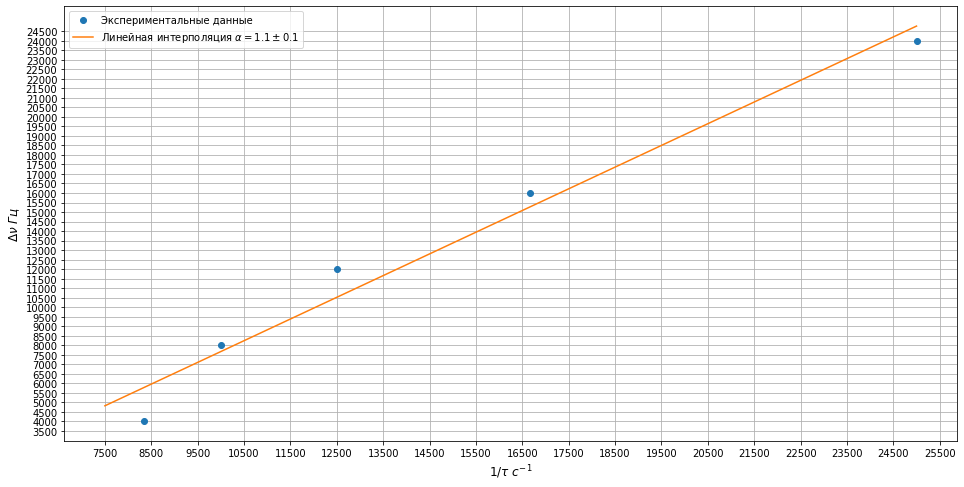

In [9]:
fig, ax = plt.subplots(figsize = (16,8))


plt.plot(1/data_deltaNu_tau.tau,data_deltaNu_tau.deltaNu,'o',label = 'Экспериментальные данные')
plt.plot(xLine,yLine,label = r'Линейная интерполяция $ \alpha = '+str(round(MNK_deltaNu_tau.slope,1))+" \pm "+str(round(MNK_deltaNu_tau.stderr,1))+"$")
plt.xlabel(r'$1/\tau \ с^{-1}$',fontsize = 12)
plt.ylabel(r'$\Delta \nu \ Гц $',fontsize = 12)
plt.grid()
plt.xticks(np.arange(7500,26000,1000))
plt.yticks(np.arange(3500,25000,500))
plt.legend()
plt.show()

### Амлитудная модуляция

In [10]:
data = pd.read_csv('ampModulation.csv')
for column in data:
    data[column] = np.array(data[column])
data

,Ampl,Amax,Amin,Freq,Amp
0,200.0,542.2,456.0,23.0,6.90
1,200.0,542.2,456.0,24.0,6.70
2,200.0,542.2,456.0,25.0,294.80
3,200.0,542.2,456.0,26.0,6.00
4,200.0,542.2,456.0,27.0,6.20
5,400.0,608.8,400.0,23.0,12.71
6,400.0,608.8,400.0,24.0,13.00
7,400.0,608.8,400.0,25.0,271.50
8,400.0,608.8,400.0,26.0,12.00
9,400.0,608.8,400.0,27.0,11.55


In [11]:
dfi.export(data.style.background_gradient(),"ampModulationData.png")

Глубина модуляции определяется по формуле:
$$M = \frac{A_{max}-A_{min}}{A_{max}+A_{min}}
$$
Построим график зависимоти $A_{side}/A_{carrier}$ от глубины модуляции $M$

Предрассчёт экспериментальных данных

In [12]:
def countModulationDepth(Amax: np.ndarray,Amin: np.ndarray):
    return (Amax-Amin)/(Amax+Amin)
modulationDepth = countModulationDepth(data['Amax'],data['Amin']).unique()
sideAmpRight = np.array(data[data.Freq == 26]['Amp'])
sideAmpLeft = np.array(data[data.Freq == 24]['Amp'])
sideAmp = np.array([np.mean([sideAmpRight[i],sideAmpLeft[i]]) for i in range(len(sideAmpRight))])
carrierAmp = np.array(data[data.Freq == 25]['Amp'])
ratio = sideAmp/carrierAmp
plot3_data = pd.DataFrame({'depth': modulationDepth,'ratio': ratio})
plot3_data


,depth,ratio
0,0.086355,0.021540
1,0.206979,0.046041
2,0.350546,0.094442
3,0.489776,0.162565
4,0.747748,0.366406
5,1.000000,0.479284


In [13]:
dfi.export(plot3_data.style.background_gradient(),'plot3_data.png')

Метод наименьших квадратов

In [14]:
MNK_plot3 = linregress(modulationDepth,ratio)
xLine = np.linspace(0.05,1.1,1000)
yLine = MNK_plot3.slope*xLine+MNK_plot3.intercept

In [15]:
print("Коэффициент a: "+str(MNK_plot3.slope)+ " +/ "+str(MNK_plot3.stderr))
print("Коэффициент b: "+str(MNK_plot3.intercept)+ " +/ "+str(MNK_plot3.intercept_stderr))

Коэффициент a: 0.5359478424341158 +/ 0.04428252170651196
Коэффициент b: -0.06233393470638718 +/ 0.025388134874241623


График зависимости разномти амплитуд от глубины модуляции

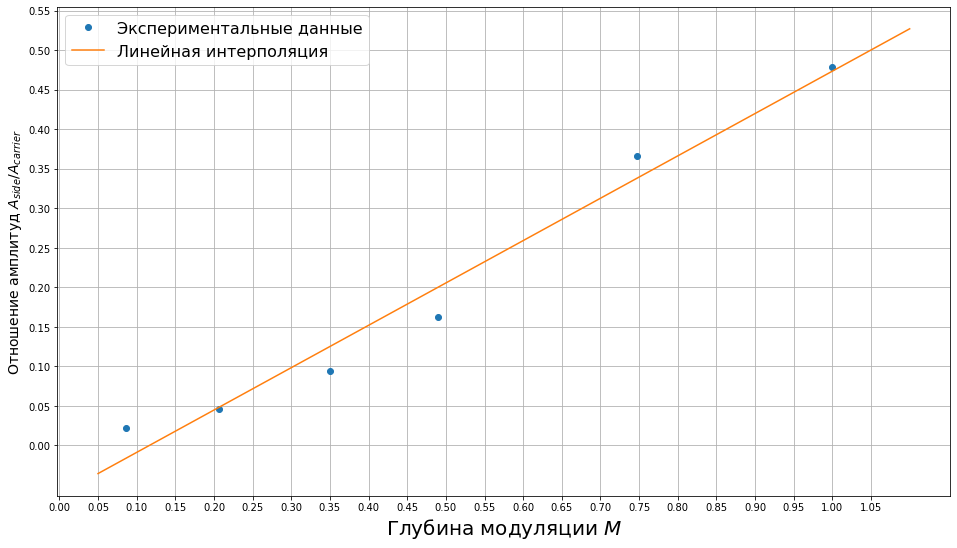

In [16]:

ax,fig = plt.subplots(figsize = (16,9))

plt.xlabel("Глубина модуляции $M$",fontsize = 20)
plt.ylabel("Отношение амплитуд $A_{side}/A_{carrier}$",fontsize = 14)


plt.xticks(np.arange(0,1.1,0.05))
plt.yticks(np.arange(0,0.6,0.05))
plt.grid()
plt.plot(modulationDepth,ratio,'o',label = 'Экспериментальные данные')
plt.plot(xLine,yLine,label = 'Линейная интерполяция')
plt.legend(fontsize = 16)
plt.show()


Графики по результатам эксперимента

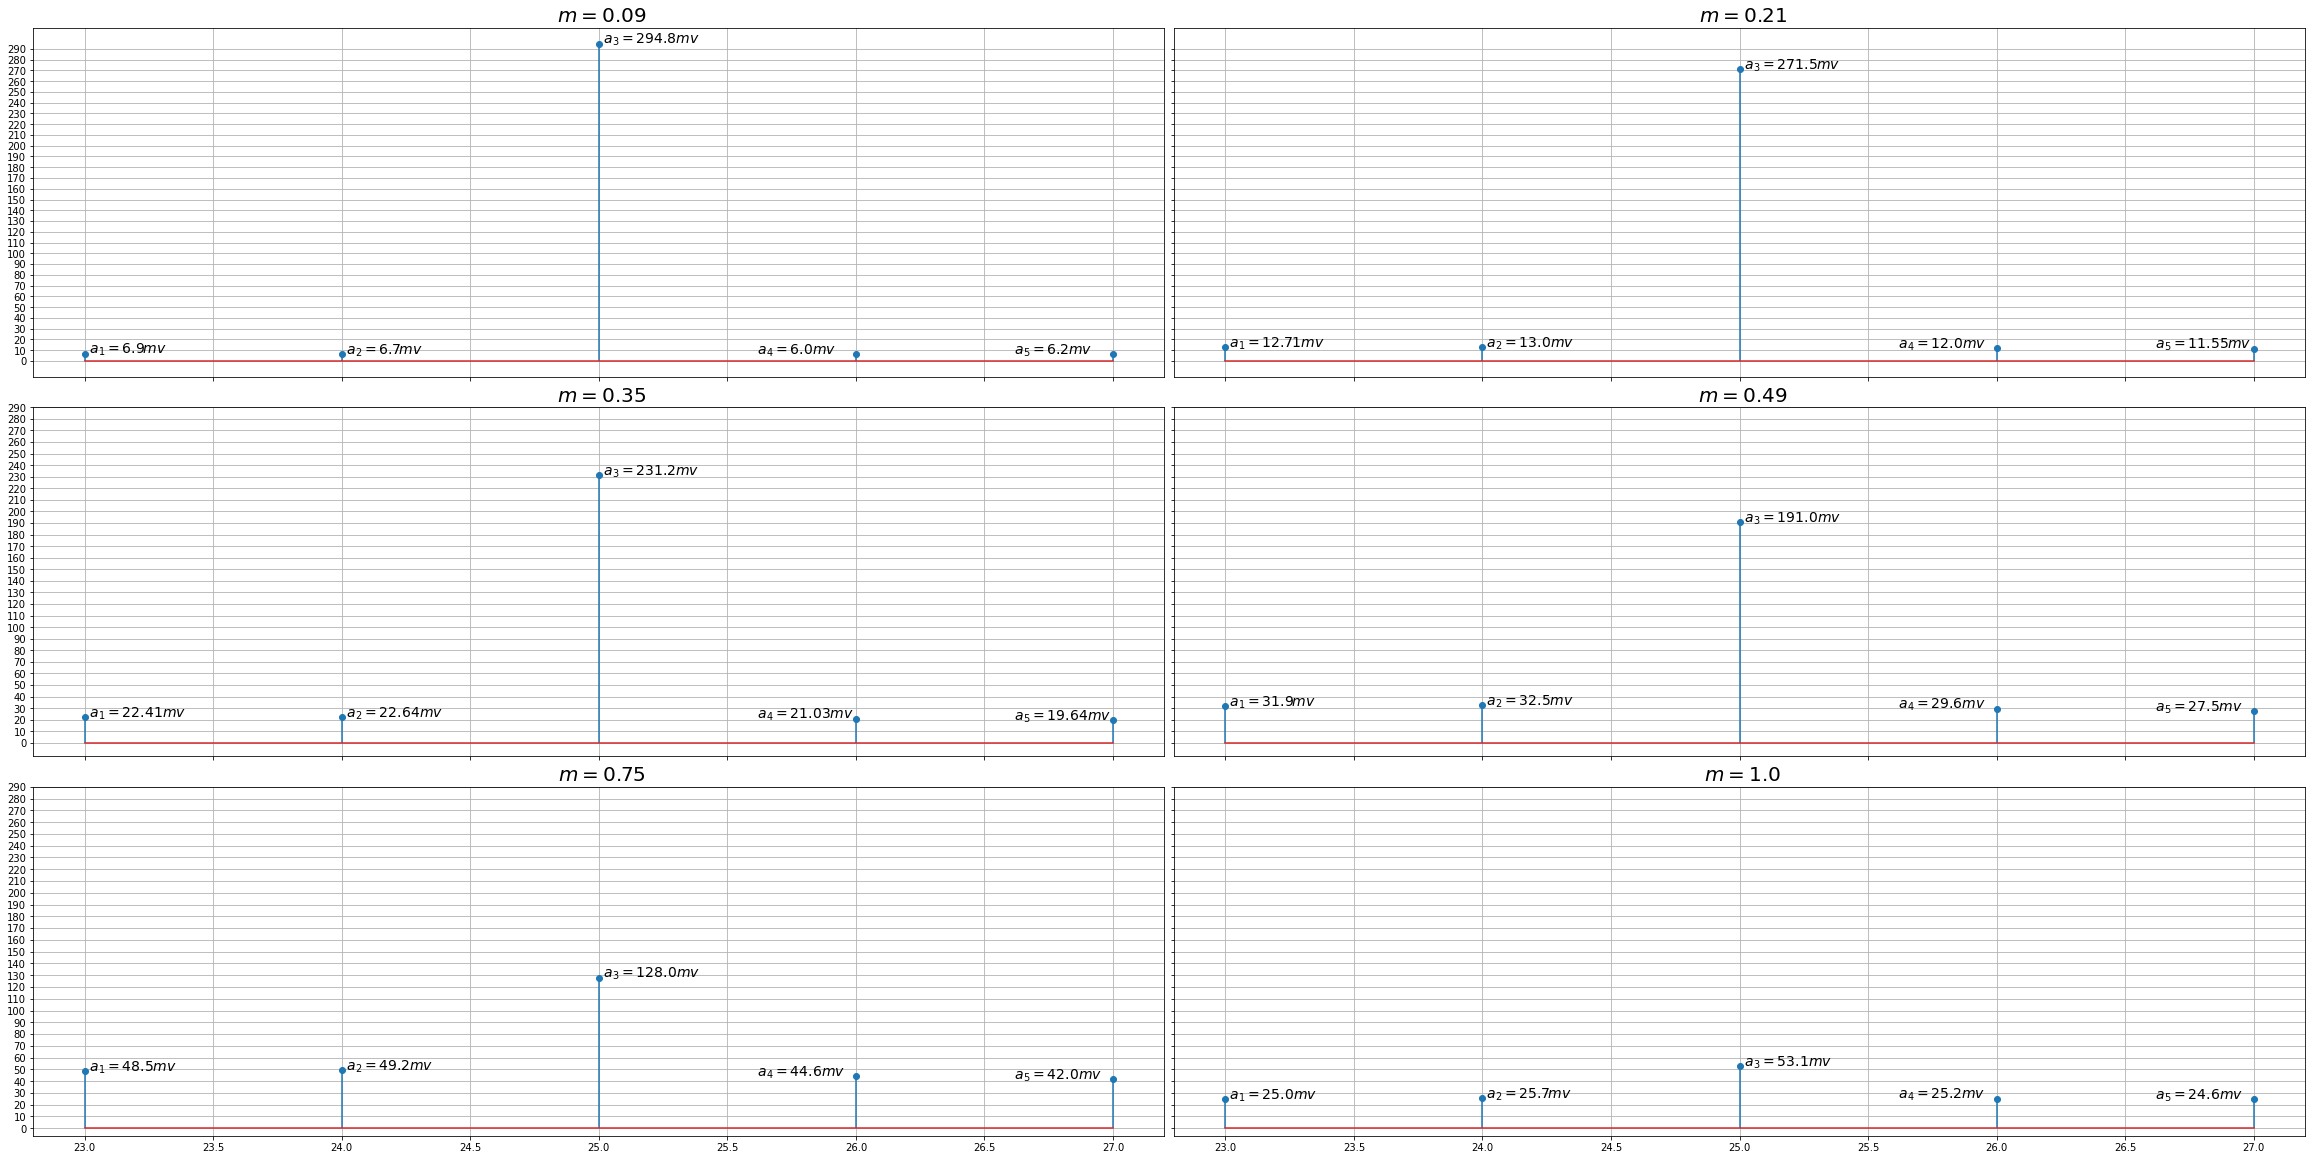

In [17]:
f = [np.array(data[data.Ampl == i]['Freq']) for i in (200,400,700,1000,1500,2000)]
amp = [np.array(data[data.Ampl == i]['Amp']) for i in (200,400,700,1000,1500,2000)]
fig = plt.figure(figsize = (32,16),constrained_layout = True)
gs = fig.add_gridspec(3, 2, hspace=0, wspace=0)
(ax1,ax2),(ax3,ax4),(ax5,ax6) = gs.subplots(sharex='col', sharey='row')
ax = [ax1,ax2,ax3,ax4,ax5,ax6]
for i in range(6):
    ax[i].stem(f[i],amp[i])
    ax[i].set_title(r"$\ m = "+str(round(modulationDepth[i],2))+"$",fontsize = 20)
    for k in range(5):
        ax[i].annotate('$ \ a_{'+str(k+1)+'} = '+str(amp[i][k])+'mv $',
                        (f[i][k]-(f[i][k]>25)*0.4,amp[i][k]),
                        fontsize = 14)
    ax[i].set_xticks(np.arange(23,27.5,0.5))
    ax[i].set_yticks(np.arange(0,300,10))
    ax[i].grid()
# fig.tight_layout(pad=8.0)
plt.show()

### Частотная модуляция(дополнительное задание)

In [18]:
data =  pd.read_csv('freqmodulationData.csv')
for column in data:
    data[column] = np.array(data[column])
data

,deltaF,freq,amp
0,100,24,15.71
1,100,25,321.60
2,100,26,16.64
3,500,24,80.00
4,500,25,300.00
5,500,26,80.00
6,1000,24,150.00
7,1000,25,250.00
8,1000,26,150.00


In [19]:
modFreq = 25000
modulationIndex = (data['deltaF'].unique()/modFreq)[1::]
ratio = (np.array(data[(data.freq == 24)]['amp'])/np.array(data[(data.freq == 25)]['amp']))[1::]
modulationIndex

array([0.02, 0.04])

In [20]:
MNK = linregress(modulationIndex,ratio)
xLine = np.linspace(0,0.045,100)
yLine = MNK.slope*xLine+MNK.intercept
print("Коэффициент a: "+str(MNK.slope)+ " +/ "+str(MNK.stderr))
print("Коэффициент b: "+str(MNK.intercept)+ " +/ "+str(MNK.intercept_stderr))

Коэффициент a: 16.666666666666664 +/ 0.0
Коэффициент b: -0.06666666666666654 +/ 0.0


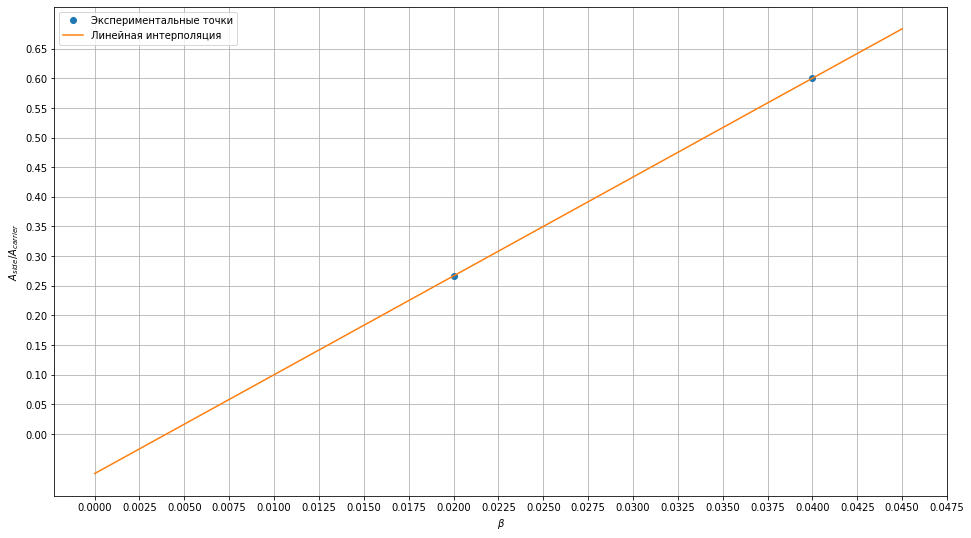

In [21]:
fig,ax = plt.subplots(figsize = (16,9))

plt.xlabel(r'$\beta$')
plt.ylabel(r'$A_{side}/A_{carrier}$')
plt.plot(modulationIndex,ratio,'o',label = 'Экспериментальные точки')
plt.plot(xLine,yLine,label = 'Линейная интерполяция')
plt.yticks(np.arange(0,0.7,0.05))
plt.xticks(np.arange(0,0.05,0.0025))
plt.legend()
plt.grid()
plt.show()